### CNN for Handwriting Analysis

**Step 1:** Installation of Necessary Packages <br />
**Step 2:** Placing photos of train and test set into train_data and test_data

In [192]:
import sys
import numpy as np
import pandas as pd
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

In [2]:
dir = "./Handwriting Data/Train/"
train_data = []
img_size = 32
for i in os.listdir(dir):
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [3]:
val_dir = "./Handwriting Data/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [169]:
print(f"Length of train set is {len(train_data)}")
print(f"Length of test set is {len(val_data)}")

Length of train set is 140000
Length of test set is 15209


In [148]:
random.shuffle(train_data)
random.shuffle(val_data)

In [149]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [150]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [151]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [152]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [153]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [154]:
print(train_X.shape,val_X.shape)
print(train_Y.shape,val_Y.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)
(140000, 35) (15209, 35)


### CNN Model

In [155]:
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense, MaxPooling2D, Dropout, ZeroPadding2D, Conv2D, BatchNormalization
import tensorflow as tf

In [156]:
model = Sequential()

In [157]:
model.add(ZeroPadding2D((1, 1), input_shape=(32, 32, 1)))
model.add(Conv2D(32, (3, 3), strides=(2,2), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(35, activation='softmax'))

In [158]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_19 (ZeroPaddi (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 17, 17, 32)        320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 2, 2, 128)       

In [159]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [160]:
history = model.fit(train_X,train_Y, epochs=80, batch_size=100, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/30
4375/4375 [==============================] - 124s 28ms/step - loss: 1.2111 - accuracy: 0.6321 - val_loss: 0.7946 - val_accuracy: 0.7790
Epoch 2/30
4375/4375 [==============================] - 100s 23ms/step - loss: 0.4836 - accuracy: 0.8414 - val_loss: 0.6950 - val_accuracy: 0.8447
Epoch 3/30
4375/4375 [==============================] - 120s 27ms/step - loss: 0.4135 - accuracy: 0.8628 - val_loss: 0.6146 - val_accuracy: 0.8586
Epoch 4/30
4375/4375 [==============================] - 108s 25ms/step - loss: 0.3757 - accuracy: 0.8753 - val_loss: 0.6156 - val_accuracy: 0.8610
Epoch 5/30
4375/4375 [==============================] - 111s 25ms/step - loss: 0.3517 - accuracy: 0.8831 - val_loss: 0.6160 - val_accuracy: 0.8513
Epoch 6/30
4375/4375 [==============================] - 112s 26ms/step - loss: 0.3368 - accuracy: 0.8867 - val_loss: 0.5977 - val_accuracy: 0.8722
Epoch 7/30
4375/4375 [==============================] - 114s 26ms/step - loss: 0.3276 - accuracy: 0.8898 - val_loss: 0

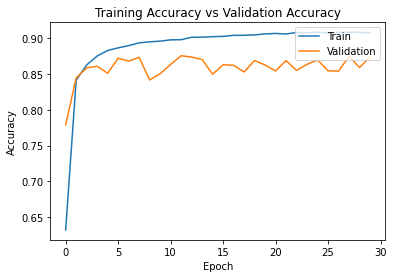

In [161]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

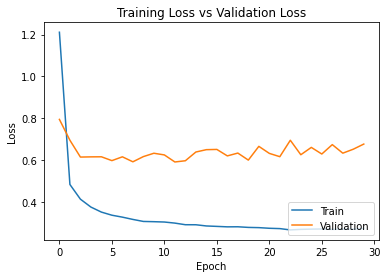

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [163]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [164]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [165]:
def get_word(letter):
    word = "".join(letter)
    return word

CHICKCWRGCR


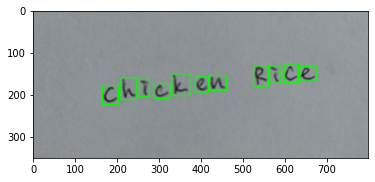

In [166]:
letter,image = get_letters("./Handwriting Data/Words/chicken.rice.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

CH1CKFAIRICE


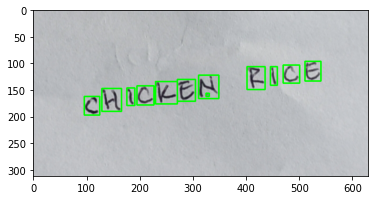

In [167]:
letter,image = get_letters("./Handwriting Data/Words/chicken.rice2.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

FY0FT7


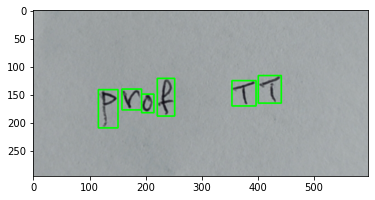

In [168]:
letter,image = get_letters("./Handwriting Data/Words/prof.tt.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)